In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,452 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122400 files and di

# import Requirement

In [6]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
%matplotlib inline

# 간단한 EDA

In [4]:
path = '/content/drive/MyDrive/data/programmers_ai/yujatea/comp_2/'

In [5]:
tmp = pd.read_csv(os.path.join(path, 'train.csv'))
tmp.head()

ID                                  text  label
0   0                          유소영비호감 성형아줌마      1
1   1                               나오지마라 썅      3
2   2  식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러~~!!!      6
3   3                    성희롱 당할 얼굴이 아닌데?ㅋㅋㅋ      5
4   4             "끝까지 해보자~쪽파리 원숭이 자한 쓰레기당"      0

In [12]:
# 정규표현식 적용하여 특정 문자열 찾기
search_regex = r'^[!@#ㄱ-ㅎㅏ-ㅣ]*$'  # !,@,#,ㄱ-ㅎ,ㅏ-ㅣ 중 하나 이상으로 시작하고 끝나는 문자열 찾기
result = tmp[tmp['text'].str.contains(search_regex)]
print(result)
print(result['label'].value_counts())

          ID                 text  label
5361    5361                   ㅂㅅ      3
6171    6171                   ㅕㅛ      6
8069    8069                   ㅈㅈ      6
9284    9284                ㅇㅇㅇㅇㅇ      6
19450  19450                    ㅂ      6
25640  25640                    ㅇ      6
25960  25960                   ㅜㅡ      6
26462  26462                ㅋㄱㅋㅋㅋ      6
27854  27854                   ㅉㅉ      6
28382  28382                   ㅈㅎ      6
32038  32038                  ㅂㅁㄱ      6
38482  38482                 ㅂㄱㅅㄷ      6
38679  38679         ㅉㅉㅉㅉㅉㅉㅉㅉㅉㅉㅉㅉ      6
41756  41756                ㄴㅈㄴㅇㅍ      6
44345  44345                   ㅈㄹ      3
45018  45018                 ㄴㅋㄴㅅ      6
46559  46559                  ㄷㄸㄱ      6
46808  46808               ㅈㄴㅁㅅㄱㄴ      1
49032  49032                  ㅅㅌㅈ      6
51680  51680  ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ      6
51920  51920                  ㅈㅅㄴ      6
52215  52215                 ㅂㅅㅅㄲ      3
53817  53817                 ㅁㅇㄱㄷ      6
55838  55838    

In [13]:
search_regex = r'^[\W_]+$'  # !,@,#,ㄱ-ㅎ,ㅏ-ㅣ 중 하나 이상으로 시작하고 끝나는 문자열 찾기
result = tmp[tmp['text'].str.contains(search_regex)]
print(result)
print(result['label'].value_counts())

          ID                       text  label
2400    2400  "👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏"      6
2842    2842            "🐓🐓🐓🐓🐓🐓🐓🐓🐓🐓🐓 🦉"      6
3197    3197              "😳😳😳😳😳😳😳😳😳😳😳"      6
3491    3491                         ??      6
5801    5801             "🤧👎👎👎👎👎👎😵🤪😝😤😡"      6
6235    6235                          ?      6
9858    9858              "👏👏👏👏👏👏👏👏👏👏🐽"      6
12903  12903              "🐕🐕🐕🐕🐕🐕🐕🐶🐶🐶🐶"      6
13635  13635         "👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍"      6
14599  14599          "🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶"      6
15315  15315                    ~~~~~~~      6
18249  18249         "💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛"      6
20278  20278                         ;;      6
23798  23798               "🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦"      6
25696  25696                ...........      6
26127  26127        "🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵🐵"      6
27088  27088              "😞😞😞😞😞🤕🤕🤕🤕🤕🤕"      6
31896  31896               "🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕"      6
35800  35800               "😵😵😵😵😵😵😲😵😵😵"      6
39122  39122          .................      6
40569  40569 

In [17]:
search_regex = r'^[a-zA-Z\s\W]+$'  # !,@,#,ㄱ-ㅎ,ㅏ-ㅣ 중 하나 이상으로 시작하고 끝나는 문자열 찾기
result = tmp[tmp['text'].str.contains(search_regex)]
print(result)
print(result['label'].value_counts())

          ID                                               text  label
870      870  I think women'd better listen to men's advice....      5
1102    1102          I'll go out and eat shellfish after work.      6
1266    1266                                     "Mi chin nyen"      3
1482    1482  Suzy, don't accept that, please! You deserve b...      6
1604    1604                                       R.I.P bro :(      6
2400    2400                          "👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏"      6
2842    2842                                    "🐓🐓🐓🐓🐓🐓🐓🐓🐓🐓🐓 🦉"      6
3197    3197                                      "😳😳😳😳😳😳😳😳😳😳😳"      6
3491    3491                                                 ??      6
5801    5801                                     "🤧👎👎👎👎👎👎😵🤪😝😤😡"      6
6183    6183                                             lovely      6
6235    6235                                                  ?      6
7339    7339  Hanbin and Hanbyul the cutest, most adorable s...      6
9858  

In [ ]:
all_zero_submission = pd.read_csv(os.path.join(path, 'all_zero_submission.csv'))
random_submission = pd.read_csv(os.path.join(path, 'random_submission.csv'))

In [ ]:
all_zero_submission.head()

ID  label
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0

In [ ]:
random_submission.head()

ID  label
0   0      4
1   1      0
2   2      6
3   3      0
4   4      4

In [ ]:
print(all_zero_submission.info())
print(random_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      13491 non-null  int64
 1   label   13491 non-null  int64
dtypes: int64(2)
memory usage: 210.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      13491 non-null  int64
 1   label   13491 non-null  int64
dtypes: int64(2)
memory usage: 210.9 KB
None


In [ ]:
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

In [ ]:
train.head()

ID                                  text  label
0   0                          유소영비호감 성형아줌마      1
1   1                               나오지마라 썅      3
2   2  식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러~~!!!      6
3   3                    성희롱 당할 얼굴이 아닌데?ㅋㅋㅋ      5
4   4             "끝까지 해보자~쪽파리 원숭이 자한 쓰레기당"      0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65863 entries, 0 to 65862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      65863 non-null  int64 
 1   text    65863 non-null  object
 2   label   65863 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
train['label'].value_counts()

6    24900
3     8895
2     8481
0     8463
1     7107
4     4118
5     3899
Name: label, dtype: int64

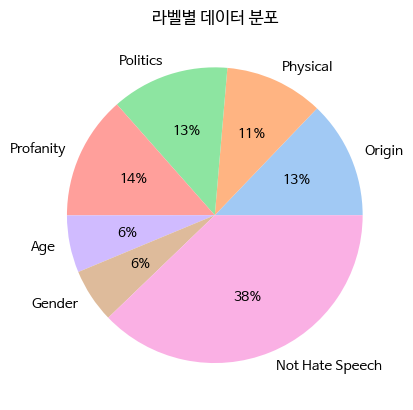

In [ ]:
data = list(train.groupby('label').count()['ID'])

colors = sns.color_palette('pastel')[0:7]
labels = ['Origin', 'Physical','Politics', 'Profanity', 'Age', 'Gender', 'Not Hate Speech']
plt.title('라벨별 데이터 분포')
plt.pie(x=data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Data Preprocessing

## 1.  Tokenizer

* soynlp 토크나이저 사용
  * 이유
    * 문장간 띄워쓰기 불분명 해보임.(대체로 리뷰성 글들의 특징같음)
    * 신조어가 섞여 있음.

  * https://github.com/lovit/soynlp


In [ ]:
# mecab 설치 => 형태소 분석기 = 토큰화
# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

In [ ]:
# from torchtext import data # torchtext.data 임포트
# from konlpy.tag import Mecab

In [ ]:
max_length = 0
for row in train.iterrows():
 max_length = max(len(row[1][1]), max_length)

In [ ]:
print(max_length)

306


In [ ]:
import re

In [ ]:
# 특수기호와 "ㅋ" 제거를 위한 정규표현식
pattern1 = '[^\w\s]'
pattern2 = 'ㅋ+'
combined_pattern = '|'.join([pattern1, pattern2])

In [ ]:
# applymap() 메서드를 사용하여 정규표현식 적용
def clean_text(s):
    s = re.sub(combined_pattern, '', s)
    return s

In [ ]:
train['text'] = train['text'].map(clean_text)

In [ ]:
train.head()

ID                             text  label
0   0                     유소영비호감 성형아줌마      1
1   1                          나오지마라 썅      3
2   2  식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러      6
3   3                   성희롱 당할 얼굴이 아닌데      5
4   4           끝까지 해보자쪽파리 원숭이 자한 쓰레기당      0

In [ ]:
# 한글 띄워쓰기 패키지
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-_woly75g
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-_woly75g
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit a058e90c9de41889c63bf2ee454bf1de064d70ff
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
from pykospacing import Spacing

#test
test = "유소영비호감 성형아줌마"

spacing = Spacing()
kospacing_sent = spacing(test)
print(kospacing_sent)


유소영 비호감 성형아줌마


In [ ]:
# train['text'] = train['text'].map(spacing)

In [ ]:
# train.to_csv('train_preprocessed.csv', index=False)

In [ ]:
preprocess = pd.read_csv(os.path.join(path,'train_preprocessed.csv'))
preprocess.head()

ID                                 text  label
0   0                        유소영 비호감 성형아줌마      1
1   1                             나오지 마라 썅      3
2   2  식상하고 지 긋지긋했는데 잘 끝나 네 오예 소리 벗고 빤스 질러      6
3   3                       성희롱 당할 얼굴이 아닌데      5
4   4            끝까지 해보자 쪽 파리 원숭이 자 한 쓰레기당      0

In [ ]:
# 'ㅎ', 'ㅇ' 제거
pattern = "[ㅎㅇ]+"
preprocess['text'] = preprocess['text'].str.replace(pattern, '', regex=True)

In [ ]:
preprocess.head()

ID                                 text  label
0   0                        유소영 비호감 성형아줌마      1
1   1                             나오지 마라 썅      3
2   2  식상하고 지 긋지긋했는데 잘 끝나 네 오예 소리 벗고 빤스 질러      6
3   3                       성희롱 당할 얼굴이 아닌데      5
4   4            끝까지 해보자 쪽 파리 원숭이 자 한 쓰레기당      0

In [ ]:
# ㄷ연속으로 나오는 형태 제거
preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{2,}\b', '')

<ipython-input-30-5acf8cfc5d9c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{2,}\b', '')


In [ ]:
preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{1,}\b', '')
preprocess['text'] = preprocess['text'].str.replace(r'\bㅠ{1,}\b', '')

<ipython-input-31-465ea0bc971e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{1,}\b', '')
<ipython-input-31-465ea0bc971e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㅠ{1,}\b', '')


In [ ]:
preprocess['text'] = preprocess['text'].str.replace(r'\bㅜ{1,}\b', '')

<ipython-input-32-50dbafa9500d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㅜ{1,}\b', '')


In [ ]:
# 비속어 처리
vocab = [
    ('[ㅅㅂ]', '시발'),
    ('ㅉ+', '쯧'),
    ('ㄹㅇ', '리얼'),
    ('ㅅㄲ', '새끼'),
    ('ㅂㅅ', '병신'),
    ('ㄱㅅㄲ', '개새끼'),
    ('ㅈㄴ', '존나'),
    ('ㅈㄹ', '지랄'),
    ('ㅈ+', '좆'),
    ('(ㅂㄷ)+', '부들')
]

In [ ]:
for k, r in vocab:
  pattern = k
  preprocess['text'] = preprocess['text'].str.replace(pattern, '', regex=True)

In [ ]:
# 자음이나 모음으로만 이루어진 부분 제거
pattern = '[ㄱ-ㅎㅏ-ㅣ]+'
preprocess['text'] = preprocess['text'].str.replace(pattern, '', regex=True)

In [ ]:
preprocess.to_csv('clean_data.csv', index=False)

* 영어가 포함된 문자열
* 혹은 영어로만 이루어진 문자열
* 한국 욕을 영어로 소리나는 대로 쓴 문자열들은 어떻게 해야되지?

In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator

# Translator 클래스 객체 선언 (translator라는 변수명은 마음대로 정해주면 됨)
translator = Translator()

In [ ]:
result = translator.translate('hi', dest='ko')
result.text

'안녕'

In [ ]:
x = "Mi chin nyen"
print(translator.translate(x, dest='ko').text)
print(re.match(r'^[a-zA-Z\s]*$', x))

벽 턱
<re.Match object; span=(0, 12), match='Mi chin nyen'>


In [ ]:
pattern = r'^[a-zA-Z\s]+$'
except_list = []
for i in range(len(preprocess)):
  x = preprocess['text'][i]
  try:
    if re.match(pattern, x):
      except_list.append(i)
  except:
    print(i)
    except_list.append(i)

2400
2842
3197
3491
5801
6235
9858
12903
13635
14599
15315
18249
20278
23798
25696
26127
27088
31896
35800
39122
40569
41617
46600
50807
51680
55838
56705
57695
58499
60854
61058
61714
63933


In [ ]:
len(except_list)

82

In [ ]:
except_list

[870,
 1102,
 1266,
 1482,
 1604,
 1935,
 2400,
 2842,
 2868,
 3062,
 3197,
 3491,
 5801,
 6183,
 6235,
 7339,
 9858,
 9911,
 10692,
 10693,
 11084,
 11482,
 12903,
 13635,
 14599,
 15315,
 15550,
 16866,
 18249,
 19036,
 20187,
 20278,
 21764,
 23798,
 25696,
 26127,
 27088,
 29937,
 31842,
 31896,
 33989,
 35800,
 36395,
 36760,
 39122,
 39416,
 40569,
 41617,
 42475,
 44143,
 44237,
 44485,
 44590,
 45975,
 46032,
 46479,
 46600,
 47196,
 47252,
 50807,
 51322,
 51680,
 52116,
 53899,
 54774,
 55082,
 55838,
 56015,
 56705,
 57695,
 57712,
 58141,
 58499,
 60854,
 61058,
 61255,
 61714,
 63607,
 63933,
 64720,
 65218,
 65477]